downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Asus\scikit_learn_data
Model Evaluation:
Accuracy: 77.50 %


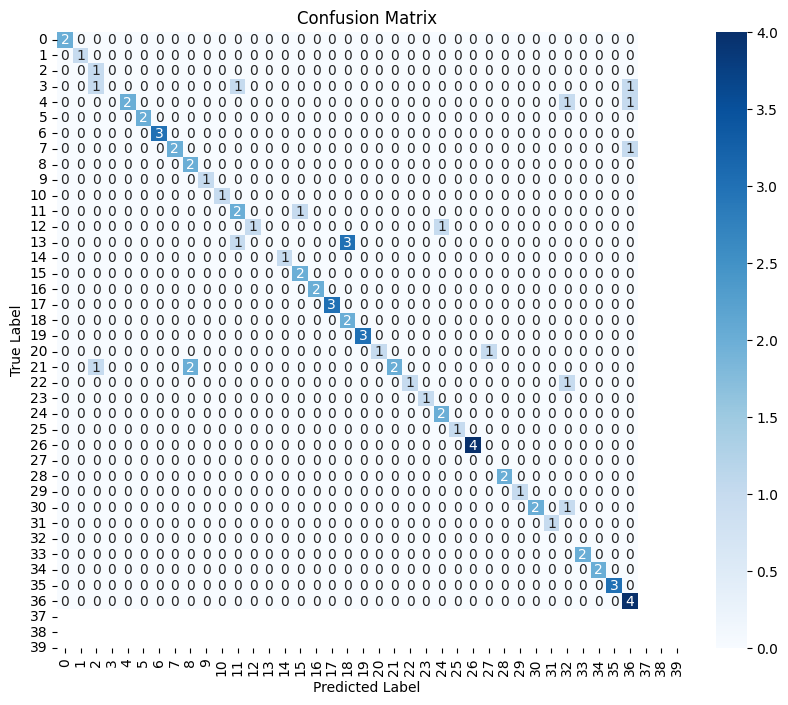

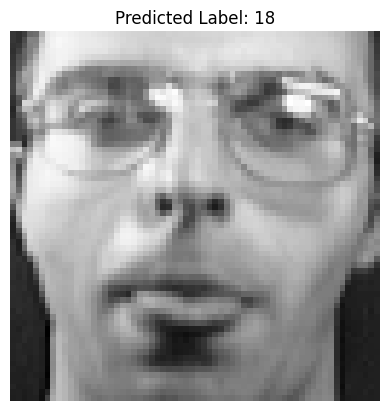

In [13]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
olivetti = fetch_olivetti_faces(shuffle=True, random_state=42)

# Data and labels
X = olivetti.data  # each image is flattened
y = olivetti.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict
y_pred = nb_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("=" * 50)
print("Model Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f} %")
print("=" * 50)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Show one prediction
test_img = X_test[0].reshape(64, 64)
plt.imshow(test_img, cmap='gray')
plt.title(f"Predicted Label: {y_pred[0]}")
plt.axis('off')
plt.show()


Model Evaluation:
Accuracy: 77.50 %


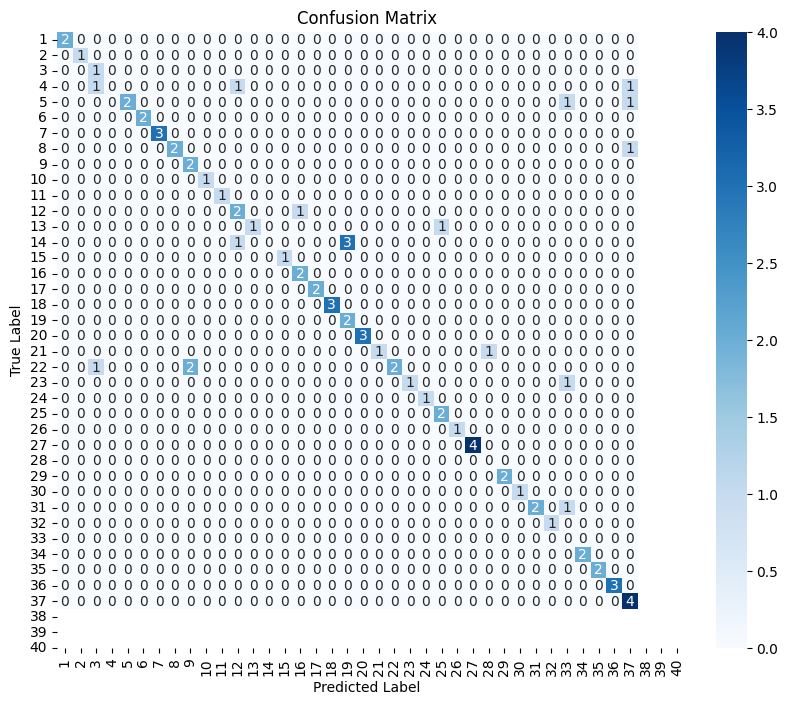

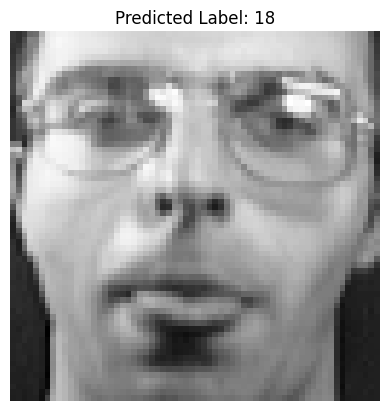

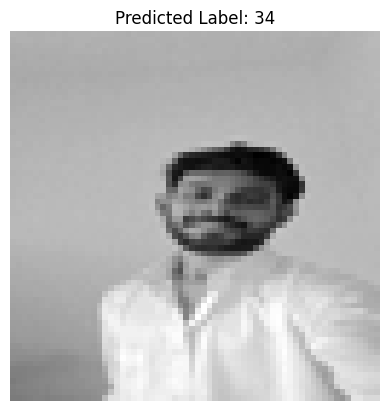

Predicted label for your image: 34


In [21]:

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

# Load the dataset using scikit-learn
olivetti = fetch_olivetti_faces(shuffle=True, random_state=42)

# Data and labels
X = olivetti.data  # Image data (each row is an image flattened into a vector)
y = olivetti.target  # Labels (which person the image corresponds to)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("=" * 50)
print("Model Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f} %")
print("=" * 50)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, 41), yticklabels=np.arange(1, 41))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Example: Visualize a test image and its predicted label
test_img = X_test[0].reshape(64, 64)  # Reshape the image for display
plt.imshow(test_img, cmap='gray')
plt.title(f"Predicted Label: {y_pred[0]}")
plt.axis('off')
plt.show()

# Load and preprocess your own photo
your_image_path = "C:\\Users\\Asus\\Sanket .jpg"  # Change this to the path of your photo
your_image = Image.open(your_image_path).convert('L')  # Convert to grayscale
your_image = your_image.resize((64, 64))  # Resize to match the size of the dataset images
your_image_array = np.array(your_image).flatten()  # Flatten the image into a vector

# Make a prediction using the trained model
your_pred = nb_classifier.predict([your_image_array])  # Model expects 2D array

# Display the result
plt.imshow(your_image, cmap='gray')
plt.title(f"Predicted Label: {your_pred[0]}")
plt.axis('off')
plt.show()

print(f"Predicted label for your image: {your_pred[0]}")


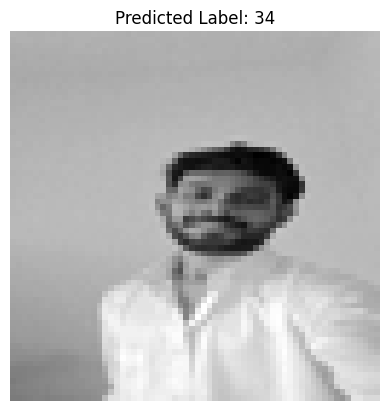

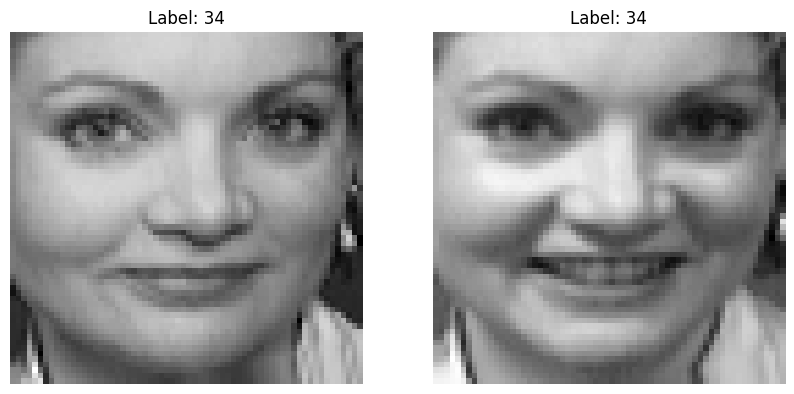

In [25]:
my_img_path = r"C:\Users\Asus\Sanket .jpg"  # Correct file path with raw string

# Convert to grayscale 
my_img = Image.open(my_img_path).convert('L')

# Resize to match the dataset image size (64x64 pixels)
my_img = my_img.resize((64, 64))  

# Convert to numpy array
my_img_array = np.array(my_img)

# Reshape the image to 2D array for prediction
my_img_reshaped = my_img_array.reshape(1, -1)  # Reshape to 2D array for prediction

# Predict the label
predicted_label = nb_classifier.predict(my_img_reshaped)

# Show the test image
plt.imshow(my_img_array, cmap='gray')
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label[0]}')
plt.show()

# Now for the comparison with two random images from the dataset

# Get the indices of images with the predicted label
indices = np.where(y == predicted_label)[0]  # Use 'y' for the dataset labels

# Select two random indices from the list of indices
random_indices = np.random.choice(indices, size=2, replace=False)

# Display the two images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    # Reshape the dataset images back to 64x64 for display
    img = X[idx].reshape(64, 64)  
    plt.subplot(1, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {y[idx]}')  # Use 'y' for the dataset labels
plt.show()
